# CAP 6618 - Machine Learning for Computer Vision

# Programming Project 3 -- Notebook 2


# Setup

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from IPython.display import Markdown, display


Using TensorFlow backend.


In [2]:
# Used to print bold text

def printmd(string):
    display(Markdown(string))

In [3]:
# Prints Classification Report, Confusion matrix, Confusion Matrix Plot, and Confusion Errors Plot

def print_results(y_pred):
    target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
    maxValuesAcrossAxis_1 = np.argmax(y_test,axis=1)
    printmd('**Classification Report**')
    print(classification_report(maxValuesAcrossAxis_1, y_pred, target_names=target_names))
    confusionMatrix = confusion_matrix(maxValuesAcrossAxis_1, y_pred)
    printmd('**Confusion Matrix**')
    print(confusionMatrix)    
    plt.matshow(confusionMatrix, cmap=plt.cm.gray)
    printmd('**Confusion Matrix Plot**')
    plt.show()
    row_sums = confusionMatrix.sum(axis=1, keepdims=True)
    norm_conf_mx = confusionMatrix / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    printmd('**Confusion Errors Plot**')
    plt.show()

In [4]:
# Setup for the convolutional network

def convolutional_network_setup():

    # Code from https://github.com/keras-team/keras 

    # Re-load and re-shape the dataset

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    num_classes = 10

    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
        
    return input_shape, x_train, y_train, x_test, y_test

# Final Network

In [5]:
input_shape, x_train, y_train, x_test, y_test = convolutional_network_setup()

num_classes = 10

In [6]:
model5 = Sequential()
   
model5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Added one more Conv2D and MaxPooling3D layers
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Added one more Conv2D and MaxPooling3D layers
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)          36928     
__________

In [7]:
batch_size = 128
epochs = 10
history5 = model5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.4319 - acc: 0.8588 - val_loss: 0.0498 - val_acc: 0.9849
Epoch 2/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0935 - acc: 0.9738 - val_loss: 0.0358 - val_acc: 0.9891
Epoch 3/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0646 - acc: 0.9822 - val_loss: 0.0295 - val_acc: 0.9914
Epoch 4/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0513 - acc: 0.9860 - val_loss: 0.0275 - val_acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0407 - acc: 0.9881 - val_loss: 0.0224 - val_acc: 0.9938
Epoch 6/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0364 - acc: 0.9901 - val_loss: 0.0274 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0311 - acc: 0.9916 - val_loss: 0.0253 - val_

In [8]:
score5 = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 0.02517630949606978
Test accuracy: 0.9935


**Classification Report**

              precision    recall  f1-score   support

     class 0       1.00      0.99      1.00       980
     class 1       0.99      1.00      1.00      1135
     class 2       1.00      1.00      1.00      1032
     class 3       0.99      1.00      1.00      1010
     class 4       0.99      0.99      0.99       982
     class 5       0.99      0.99      0.99       892
     class 6       0.99      0.99      0.99       958
     class 7       0.99      1.00      0.99      1028
     class 8       1.00      0.99      1.00       974
     class 9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Confusion Matrix**

[[ 975    0    0    0    0    0    4    1    0    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   1    0 1029    0    0    0    0    2    0    0]
 [   0    0    0 1007    0    3    0    0    0    0]
 [   0    0    1    0  973    0    2    1    1    4]
 [   0    0    0    4    0  886    1    1    0    0]
 [   2    3    0    0    1    2  949    0    1    0]
 [   0    3    2    0    0    0    0 1023    0    0]
 [   0    0    2    1    0    1    0    0  968    2]
 [   1    0    0    1    5    5    0    6    0  991]]


**Confusion Matrix Plot**

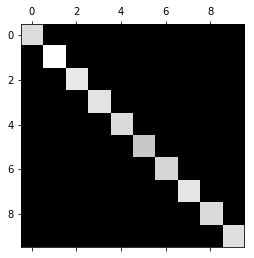

**Confusion Errors Plot**

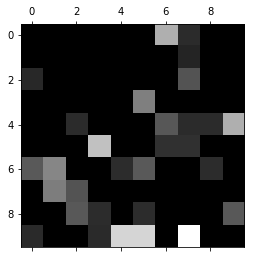

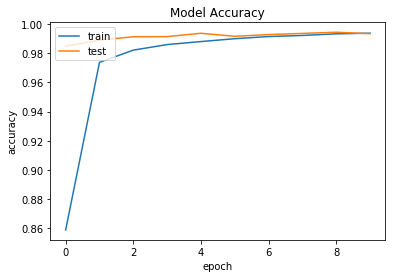

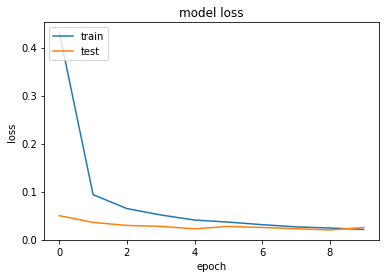

In [10]:
# Accuracy and Loss plots

y_pred = model5.predict_classes(x_test)

print_results(y_pred)

plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

